# Задача из книжки Демченко стр. 138, вариант №1, задание №12:
Дифференциальная задача:
$$
\begin{cases}
\frac{\delta u}{\delta t} -e^{-x}\frac{\delta u}{\delta x}=x;\: 0<t\le1; \: 0\le x<1
\\
u(x,0)=e^{2x}-(x-1)e^{x};\:u(1,t)=(e+t)^{2}
\end{cases}
$$
Разностная схема:
$$
D_{h}=\{
(x_{l},t^{n}):x_{l}=hl,hL=1,l=\overline{0,L};\:
t^{n}=n\tau, \tau N=1, n=\overline{0,N}
\},
$$
$$
\begin{cases}
u_{l}^{n+1}=u_{l}^{n}+\frac{\tau}{h}e^{-x_{l}}(u_{l+1}^{n}-u_{l}^{n})+\tau x_{l},\: l=\overline{0,L-1},\: n=\overline{0,N-1}
\\
u_{l}^{0}=e^{2x_{l}}-(x_{l}-1)e^{x_{l}},\: l=\overline{0,L}; \:u_{L}^{n}=(e+t^{n})^{2}, \: n=\overline{1,N}
\end{cases}
$$

###  1. Шаблон разностной схемы:
Схему можно переписать как
$$
\frac{u_{l}^{n+1}-u_{l}^{n}}{\tau}-e^{x_{l}}\frac{u_{l+1}^{n}-u_{l}^{n}}{h}=x_{l}
$$
Тогда эта схема является "правым уголком":
![title](scheme.jpg)

### 2. Найдем условие устойчивости:
Выполним подстановку в разностную схему: $u_{l}^{n}=\lambda^{n}e^{i\alpha l}$

Также воспользуемся принципом «замороженных коэффициентов»: $e^{x_{l}}=b$

Получим:
$$
\frac{\lambda-1}{\tau}-b\frac{e^{i\alpha}-1}{h}=0\\
\lambda=1+\tau b\frac{e^{i\alpha}-1}{h}\\
|\lambda|\le 1 => 0\le \frac{\tau b}{h} \le 1
$$

А значит:
$$
\frac{\tau}{h}*max (e^{-x_{l}}) \le 1
$$
Так как $0 \le x \le 1$, то:
$$
\frac{\tau}{h}\le 1
$$

### 3. Исследуем схему на аппроксимацию:
Если сделать замену по ряду Тейлору в разностной схеме, то можно получить, что:
$$
\frac{u_{l}^{n+1}-u_{l}^{n}}{\tau}-e^{x_{l}}\frac{u_{l+1}^{n}-u_{l}^{n}}{h}-x_{l}=
\frac{u+u_{t}\tau+o(\tau^{2})-u}{\tau}-e^{x}\frac{u+u_{x}h+o(h^{2})-u}{h}-x=
u_{t}-e^{-x}u_{x}-x + o(\tau,h)
$$
Получили схему 1-го порядка аппроксимации.

### 4. Найдем численные решения при трёх различных значениях шагов:

In [8]:
from math import *

# Константы условия
t_min = 0
t_max = 1
x_min = 0
x_max = 1

# Функция разностной схемы
def scheme(u_mid, u_right, x, tau, h):
    return u_mid + tau / h * exp(-x) * (u_right - u_mid) + tau * x

# Функции краевых условий
def scheme_bot(x):
    return exp(2 * x) - (x - 1) * exp(x)
def scheme_right(t):
    return (exp(1) + t) ** 2

# Вычисление массива решения
def method(u, tau, h, T_length, X_length, time, coord):
    for i in range(0, X_length):
        u[0][i] = scheme_bot(coord[i])
    for i in range(0, T_length):
        u[i][X_length - 1] = scheme_right(time[i])
    for i in range(0, T_length - 1):
        for j in range(X_length - 2, -1, -1):
            u[i+1][j] = scheme(u[i][j], u[i][j+1], coord[j], tau, h)

In [9]:
import matplotlib.pyplot as plt 
import numpy as np

# Функция для построения графиков, не несет логического содержания
def build_grafics(
    mas_params=[[1e-1, 1e-1], ],
    size_height=17, size_weight=20,
    color=False
):
    # Настройка выведения
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[1] = size_height  # height
    fig_size[0] = size_weight  # weight
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    M_weight = 2
    M_height = len(mas_params)
    
    i = 0
    # Решаем
    for tau, h in mas_params:
        T_length = int((t_max - t_min) / tau)
        time = np.linspace(t_min, t_max, T_length)
        
        X_length = int((x_max - x_min) / h)
        coord = np.linspace(x_min, x_max, X_length)
        
        # Считаем матрицу решений
        u = np.zeros((T_length, X_length))
        method(u, tau, h, T_length, X_length, time, coord)
        
        convergence = True if tau/h <= 1 else False
        print(f'{i+1}. Численное решение u(x,t) с h={h} и tau={tau} ' \
            f'{"сходится" if convergence else "расходится"}')
        
        ax = plt.subplot(M_height, M_weight, 2 * i + 1)
        if color:
            plt.plot(coord, u.transpose(), linewidth=3.0, color='blue')
        else:
            plt.plot(coord, u.transpose(), linewidth=3.0)
        ax.set_title(f'Решение u(x) c h={h}; tau={tau}')

        ax = plt.subplot(M_height, M_weight, 2 * i + 2)
        if color:
            plt.plot(time, u, linewidth=3.0, color='green')
        else:
            plt.plot(time, u, linewidth=3.0)
        ax.set_title(f'Решение u(t) c h={h}; tau={tau}')
        
        i=i+1

1. Численное решение u(x,t) с h=0.01 и tau=0.1 расходится
2. Численное решение u(x,t) с h=0.1 и tau=0.1 сходится
3. Численное решение u(x,t) с h=0.05 и tau=0.05 сходится


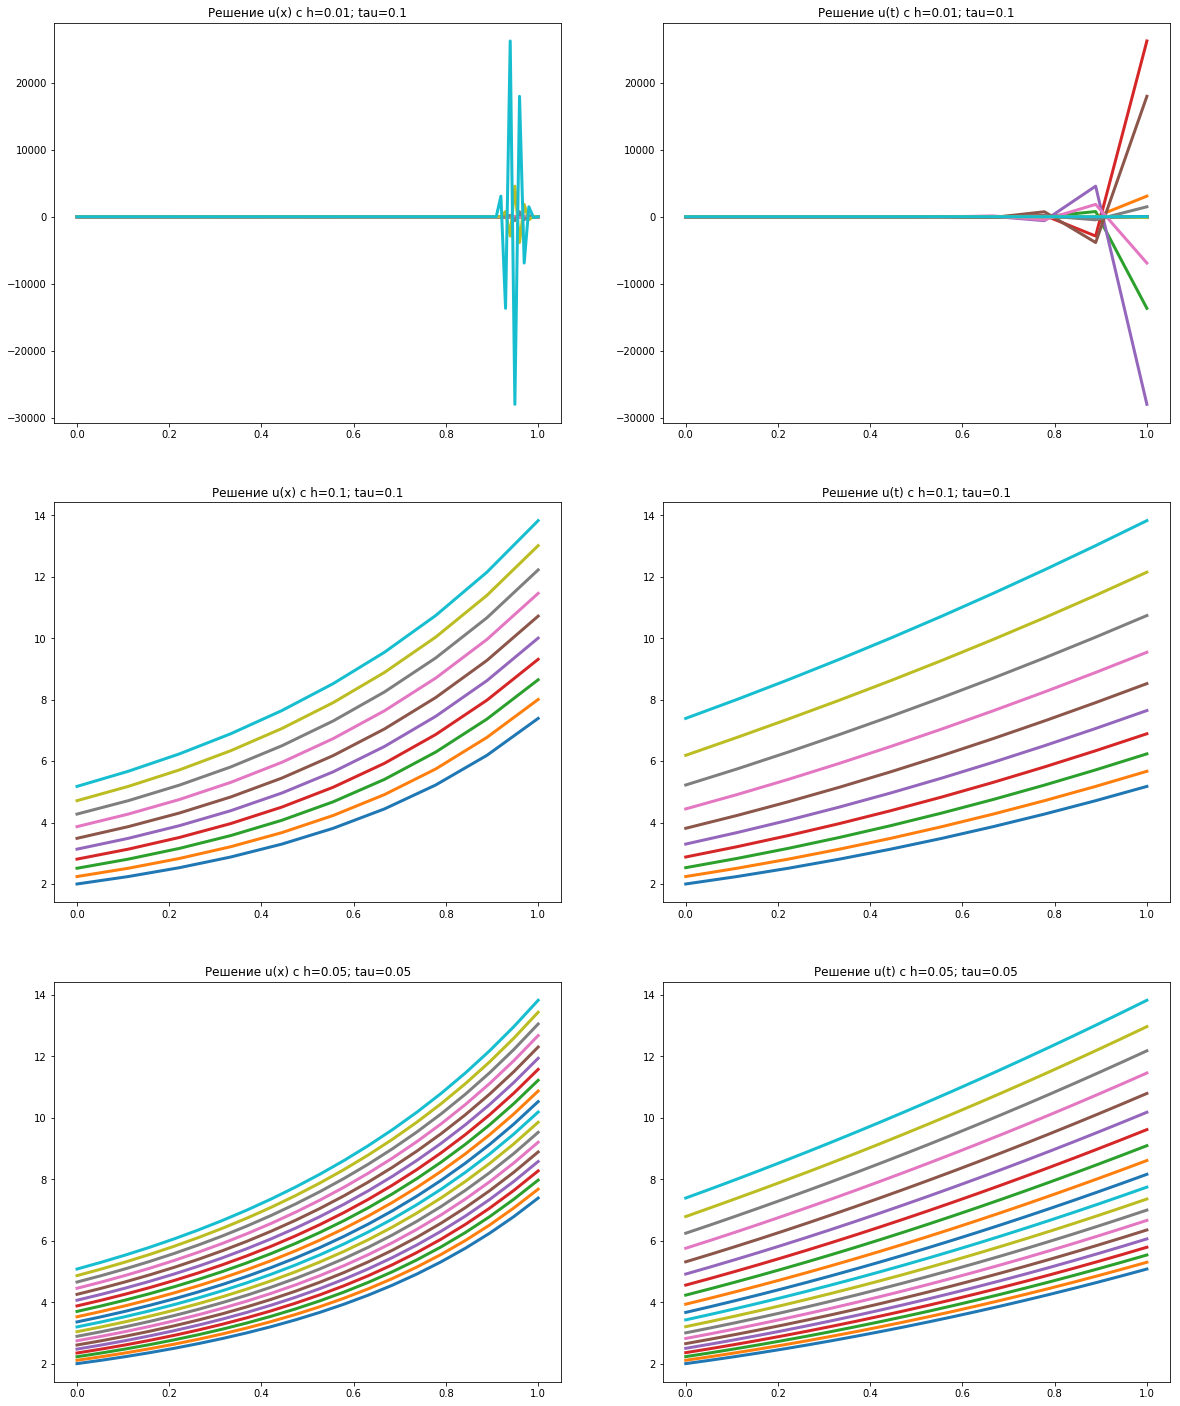

In [10]:
build_grafics(
    mas_params=[
        [0.1, 0.01], 
        [0.1,0.1], 
        [0.05,0.05]
    ],
    size_height=25
)

### 5. Решение при разных значениях шагов сетки:

#### Расходится:

1. Численное решение u(x,t) с h=0.001 и tau=0.01 расходится
2. Численное решение u(x,t) с h=0.01 и tau=0.02 расходится
3. Численное решение u(x,t) с h=0.005 и tau=0.01 расходится


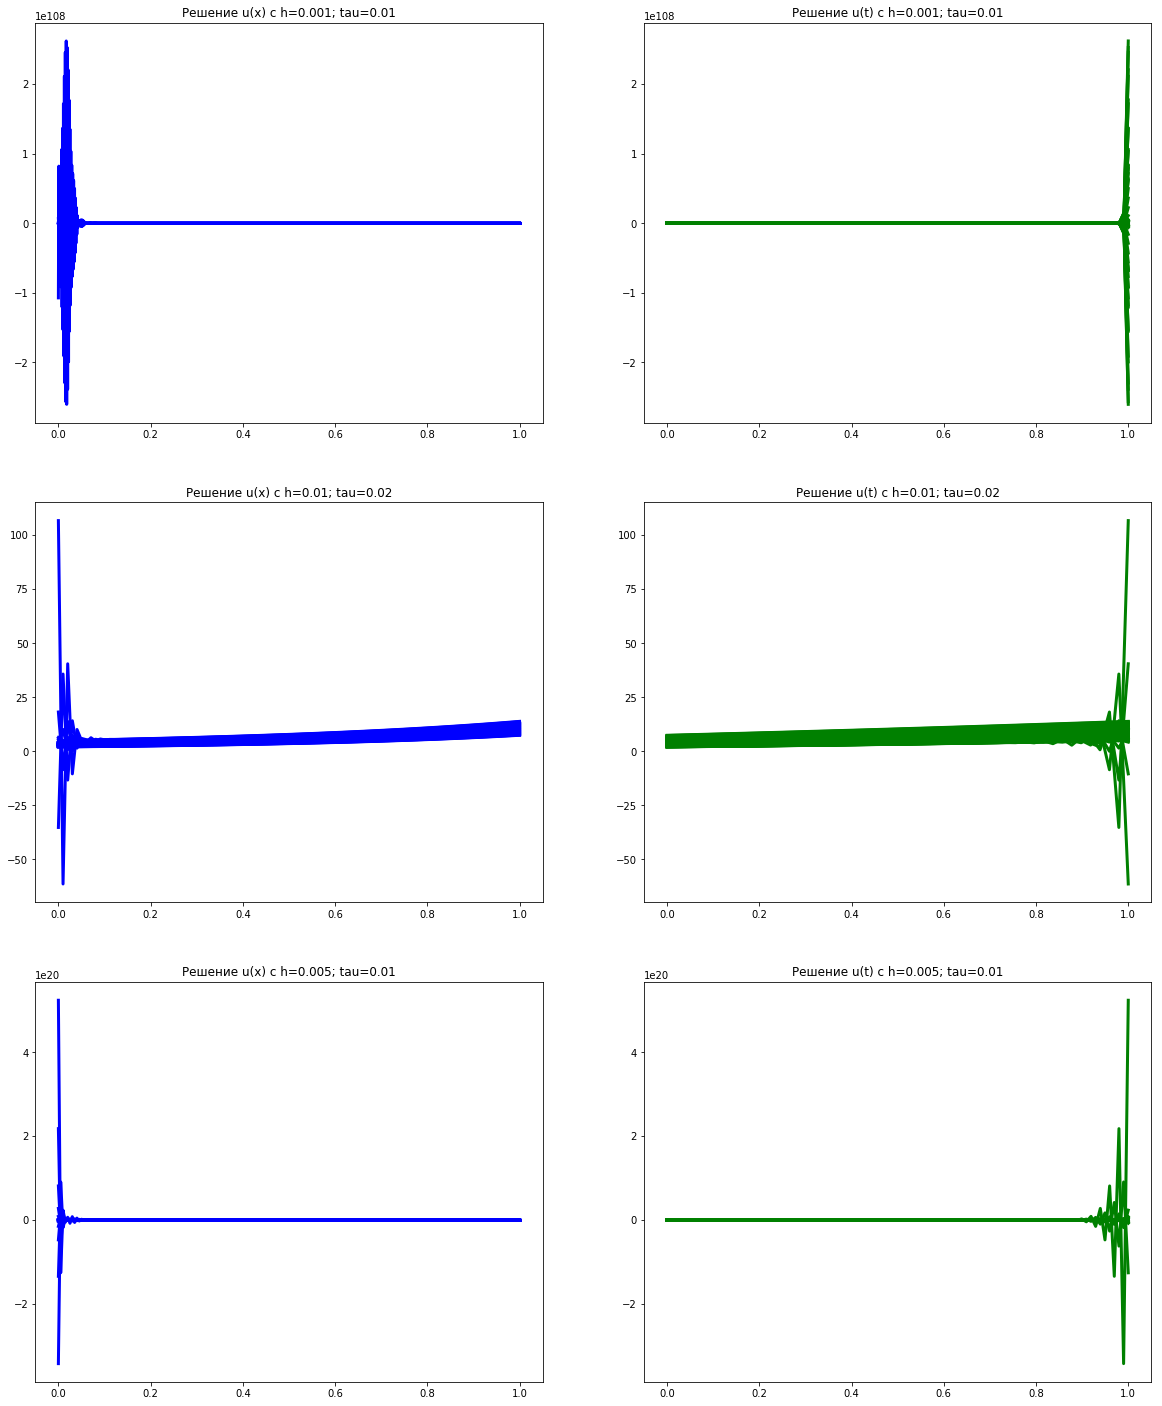

In [11]:
build_grafics(
    mas_params=[
        [0.01, 0.001], 
        [0.02,0.01], 
        [1e-2,5e-3]
    ],
    size_height=25,
    color=True
)

#### Сходится:

1. Численное решение u(x,t) с h=0.001 и tau=0.001 сходится
2. Численное решение u(x,t) с h=0.05 и tau=0.001 сходится
3. Численное решение u(x,t) с h=0.01 и tau=0.001 сходится
4. Численное решение u(x,t) с h=0.01 и tau=0.01 сходится


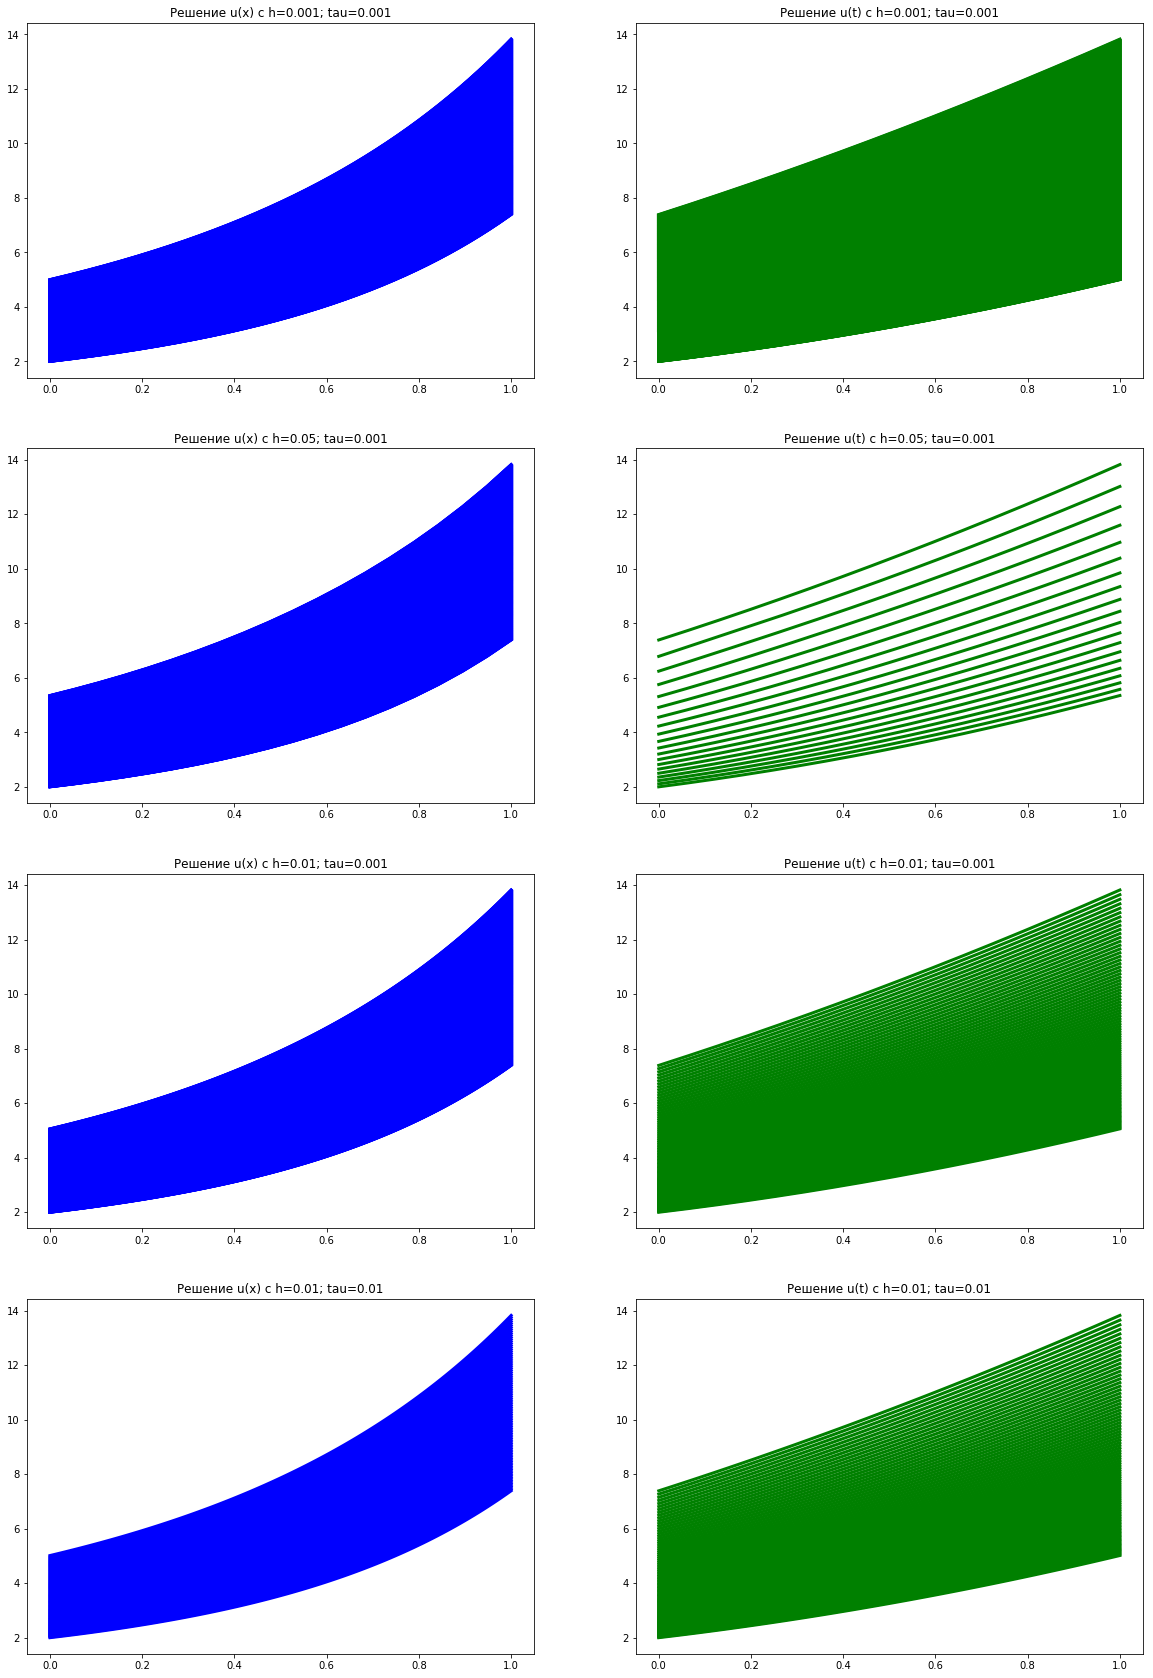

In [12]:
build_grafics(
    mas_params=[
        [1e-3, 1e-3], 
        [1e-3, 5e-2], 
        [1e-3, 1e-2], 
        [1e-2, 1e-2]
    ],
    size_height=30,
    color=True
)

### Результат:
Получили результаты на графиках согласно выведенной до этого теории